# **IMPORT LIBS & IMPORT DATASET**

In [395]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score


In [396]:
dataset = pd.read_csv('Factory_Salary.csv')
dataset1 = dataset
dataset2 = dataset
dataset3 = dataset

**DATA** **PREPARATION**

In [397]:
dataset1.describe()

,Rank,Insalubrity,Size_Production,Salary
count,264.000000,264.000000,264.000000,264.000000
mean,4.909091,15.681818,988.333333,21030.461230
std,1.313600,6.682726,231.372715,4323.920780
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,11.000000,805.000000,17830.000000
50%,5.000000,18.000000,985.000000,20350.000000
75%,6.000000,22.000000,1185.000000,23818.014706
max,7.000000,22.000000,1400.000000,33157.058824


In [398]:
dataset1.isnull().sum()

Date               0
Profession         0
Rank               0
Equipment          0
Insalubrity        0
Size_Production    0
Salary             0
dtype: int64

In [399]:
dataset1 = dataset.set_index('Date')
dataset1.index= pd.to_datetime(dataset.index)

In [400]:
dataset2 = dataset.set_index('Date')
dataset2.index= pd.to_datetime(dataset.index)

In [401]:
dataset3 = dataset.set_index('Date')
dataset3.index= pd.to_datetime(dataset.index)

In [402]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000000263
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Profession       264 non-null    object 
 1   Rank             264 non-null    int64  
 2   Equipment        264 non-null    object 
 3   Insalubrity      264 non-null    int64  
 4   Size_Production  264 non-null    int64  
 5   Salary           264 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 14.4+ KB


In [403]:
dataset1.index

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000000254',
               '1970-01-01 00:00:00.000000255',
               '1970-01-01 00:00:00.000000256',
               '1970-01-01 00:00:00.000000257',
               '1970-01-01 00:00:00.000000258',
               '1970-01-01 00:00:00.000000259',
               '1970-01-01 00:00:00.000000260',
               '1970-01-01 00:00:00.000000261',
               '1970-01-01 00:00:00.000000262',
               '1970-01-01 00:00:00.000000263'],
              dtype=

**VISUALISASI**

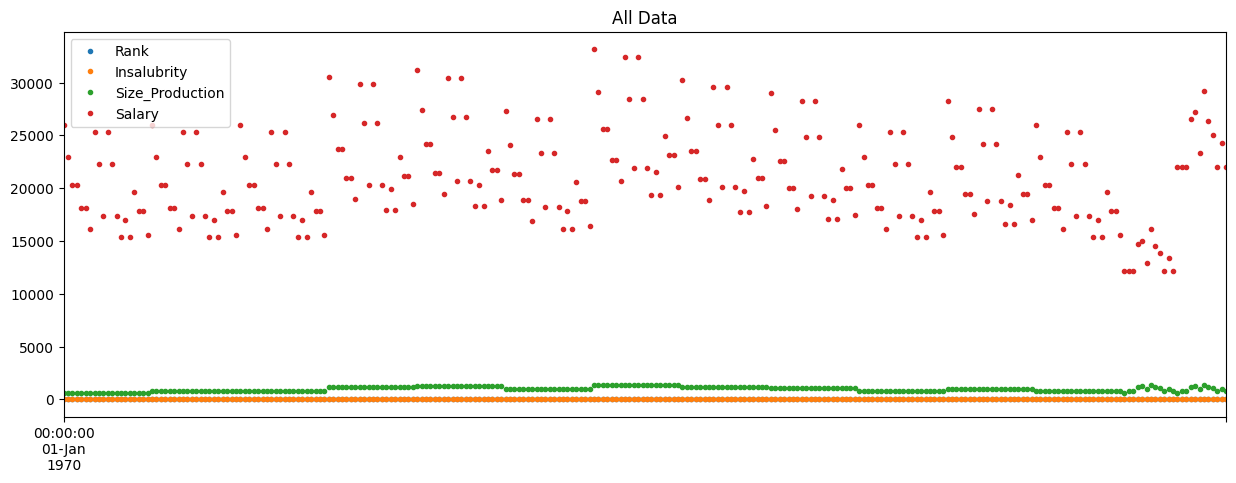

In [404]:
dataset1.plot(style = '.', figsize = (15,5), title = 'All Data')
plt.show()

**FEATURE BARU**

In [405]:
dataset1

,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
1970-01-01 00:00:00.000000000,Metal heater,7,Heating furnaces,22,580,26020.000000
1970-01-01 00:00:00.000000001,Metal heater,6,Heating furnaces,22,580,22980.000000
1970-01-01 00:00:00.000000002,Metal heater,5,Heating furnaces,22,580,20350.000000
1970-01-01 00:00:00.000000003,Metal heater,5,Heating furnaces,22,580,20350.000000
1970-01-01 00:00:00.000000004,Metal heater,4,Heating furnaces,22,580,18090.000000
...,...,...,...,...,...,...
1970-01-01 00:00:00.000000259,Quality controller,7,Control and measuring equipment,0,1180,26342.235294
1970-01-01 00:00:00.000000260,Quality controller,7,Control and measuring equipment,0,1080,25044.588235
1970-01-01 00:00:00.000000261,Quality controller,7,Control and measuring equipment,0,780,22060.000000
1970-01-01 00:00:00.000000262,Quality controller,7,Control and measuring equipment,0,1020,24266.000000


In [406]:
df = pd.DataFrame(data, columns=['Profession'])

# Mengelompokkan data berdasarkan profesi dan menghitung jumlah kemunculan
counts = df.groupby('Profession').size().reset_index(name='Count')

# Tampilkan hasil
print(counts)

         Profession  Count
0      Metal heater      5
1     Metal planter      1
2        Refractory      1
3            Roller      2
4  Roller assistant      1


In [407]:
import plotly.graph_objects as go

# Data dari dataset
professions = ['Cleaner','Hot metal cutter','Metal heater','Metal planter','Operator','Quality controller','Refractory','Roller','Roller assistant']
counts = [24,12,60,12,36,12,12,60,36]

# Warna untuk setiap bagian chart
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'lightcoral']

# Membuat pie chart dengan Plotly
fig = go.Figure(data=[go.Pie(labels=professions, values=counts)])

# Konfigurasi tampilan pie chart
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Tampilkan pie chart
fig.show()


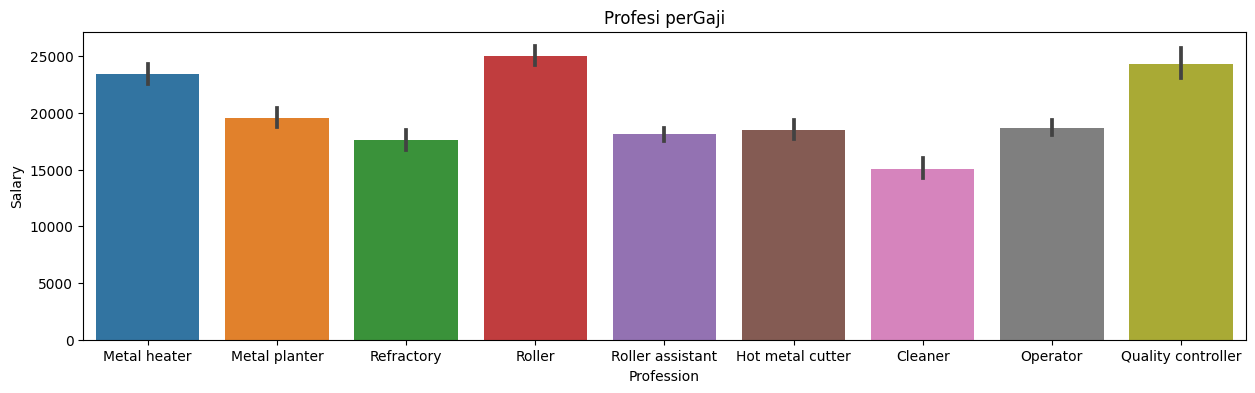

In [408]:
fig , ax = plt.subplots(figsize=(15, 4))
sns.barplot(data=dataset1, x='Profession', y='Salary')
plt.title('Profesi perGaji')
plt.show()

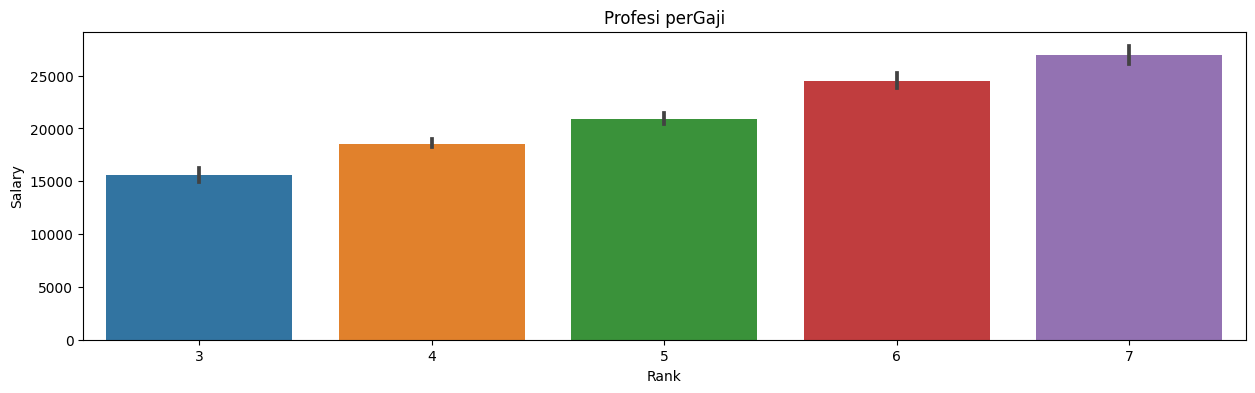

In [409]:
fig , ax = plt.subplots(figsize=(15, 4))
sns.barplot(data=dataset1, x='Rank', y='Salary')
plt.title('Profesi perGaji')
plt.show()

**Modelling**

# **Prediction salary**

***multiple regression linear***

In [410]:
le = LabelEncoder()
dataset1['Profession'] = le.fit_transform(dataset1['Profession'])
dataset1['Equipment'] = le.fit_transform(dataset1['Equipment'])

dataset1

,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
1970-01-01 00:00:00.000000000,2,7,2,22,580,26020.000000
1970-01-01 00:00:00.000000001,2,6,2,22,580,22980.000000
1970-01-01 00:00:00.000000002,2,5,2,22,580,20350.000000
1970-01-01 00:00:00.000000003,2,5,2,22,580,20350.000000
1970-01-01 00:00:00.000000004,2,4,2,22,580,18090.000000
...,...,...,...,...,...,...
1970-01-01 00:00:00.000000259,5,7,1,0,1180,26342.235294
1970-01-01 00:00:00.000000260,5,7,1,0,1080,25044.588235
1970-01-01 00:00:00.000000261,5,7,1,0,780,22060.000000
1970-01-01 00:00:00.000000262,5,7,1,0,1020,24266.000000


In [411]:
dataset1.isnull().sum()

Profession         0
Rank               0
Equipment          0
Insalubrity        0
Size_Production    0
Salary             0
dtype: int64

In [412]:
X = dataset1.drop(columns = 'Salary')
X

,Profession,Rank,Equipment,Insalubrity,Size_Production
1970-01-01 00:00:00.000000000,2,7,2,22,580
1970-01-01 00:00:00.000000001,2,6,2,22,580
1970-01-01 00:00:00.000000002,2,5,2,22,580
1970-01-01 00:00:00.000000003,2,5,2,22,580
1970-01-01 00:00:00.000000004,2,4,2,22,580
...,...,...,...,...,...
1970-01-01 00:00:00.000000259,5,7,1,0,1180
1970-01-01 00:00:00.000000260,5,7,1,0,1080
1970-01-01 00:00:00.000000261,5,7,1,0,780
1970-01-01 00:00:00.000000262,5,7,1,0,1020


In [413]:
y = dataset1['Salary']
y

1970-01-01 00:00:00.000000000    26020.000000
1970-01-01 00:00:00.000000001    22980.000000
1970-01-01 00:00:00.000000002    20350.000000
1970-01-01 00:00:00.000000003    20350.000000
1970-01-01 00:00:00.000000004    18090.000000
                                     ...     
1970-01-01 00:00:00.000000259    26342.235294
1970-01-01 00:00:00.000000260    25044.588235
1970-01-01 00:00:00.000000261    22060.000000
1970-01-01 00:00:00.000000262    24266.000000
1970-01-01 00:00:00.000000263    22060.000000
Name: Salary, Length: 264, dtype: float64

In [414]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [415]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [416]:
lr.fit(X_train,y_train)

LinearRegression()

In [417]:
c = lr.intercept_
c

-2921.709724923181

In [418]:
m = lr.coef_
m

array([   9.39647744, 2795.02062394,  -50.29203601,  180.21905755,
          7.62570049])

In [419]:
y_pred_train = lr.predict(X_train)

In [420]:
y_pred_train

array([27046.692379  , 18534.55787742, 18671.0269846 , 17656.96762789,
       17440.99266292, 25700.03125952, 29284.11049029, 16564.3072045 ,
       22102.59220555, 26882.2827568 , 28953.11750175, 17629.39388476,
       19347.41778567, 16220.88058436, 21813.39719862, 19948.43260436,
       21139.7274991 , 20288.46899035, 26779.53719417, 13004.20514298,
       21626.08671238, 17579.62543758, 19359.32782844, 17974.79169729,
       18165.70430761, 25776.28826443, 18458.08898258, 19182.10772609,
       29677.30338075, 20364.72599526, 21149.12397654, 16449.65159909,
       13909.1572457 , 18229.31796785, 18318.21831743, 17203.1804276 ,
       16359.51335902, 30058.5884053 , 23210.03865521, 19359.32782844,
       20884.46792664, 19385.81638617, 20162.23164832, 19728.70281022,
       24174.89116132, 28750.31145592, 22955.30267158, 14461.67872629,
       23984.51657023, 15373.01230976, 26005.05927916, 26474.50917453,
       25612.40223106, 24087.26213286, 19194.90377585, 16817.05538848,
      

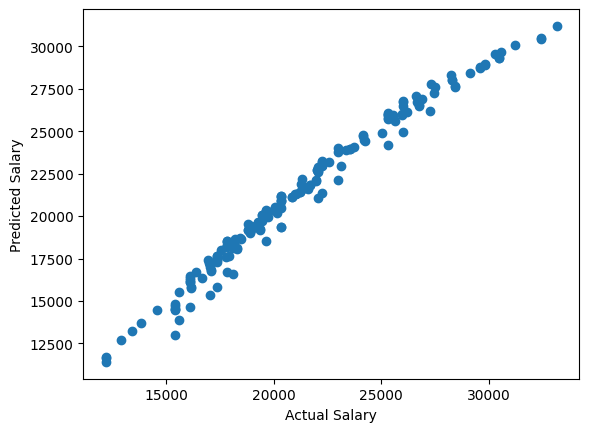

In [421]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

In [422]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.9777751567021955

In [423]:
 y_pred_test = lr.predict(X_test)

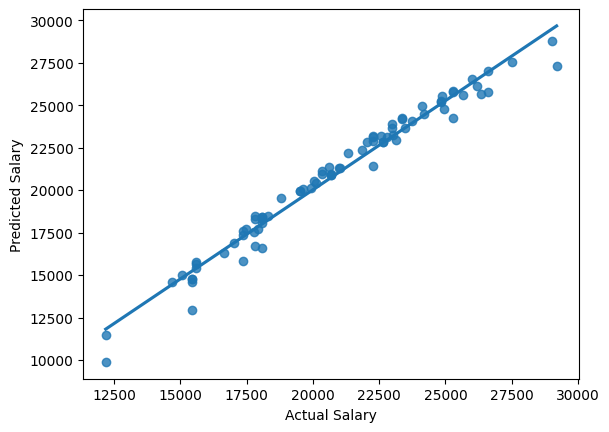

In [424]:
#Visualisasi prediksi
sns.regplot(x=y_test,y=y_pred_test, ci = None)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

In [425]:
H3 = r2_score(y_test,y_pred_test)*100
H3

96.57282855759746

EKSPERIMEN TANPA INSALUBRITY

In [426]:
dataset2 = dataset2.drop('Insalubrity',axis =1 )

In [427]:
le = LabelEncoder()
dataset2['Profession'] = le.fit_transform(dataset1['Profession'])
dataset2['Equipment'] = le.fit_transform(dataset1['Equipment'])

In [428]:
dataset2

,Profession,Rank,Equipment,Size_Production,Salary
1970-01-01 00:00:00.000000000,2,7,2,580,26020.000000
1970-01-01 00:00:00.000000001,2,6,2,580,22980.000000
1970-01-01 00:00:00.000000002,2,5,2,580,20350.000000
1970-01-01 00:00:00.000000003,2,5,2,580,20350.000000
1970-01-01 00:00:00.000000004,2,4,2,580,18090.000000
...,...,...,...,...,...
1970-01-01 00:00:00.000000259,5,7,1,1180,26342.235294
1970-01-01 00:00:00.000000260,5,7,1,1080,25044.588235
1970-01-01 00:00:00.000000261,5,7,1,780,22060.000000
1970-01-01 00:00:00.000000262,5,7,1,1020,24266.000000


In [429]:
dataset2.isnull().sum()

Profession         0
Rank               0
Equipment          0
Size_Production    0
Salary             0
dtype: int64

In [430]:
X = dataset2.drop(columns = 'Salary')
X

,Profession,Rank,Equipment,Size_Production
1970-01-01 00:00:00.000000000,2,7,2,580
1970-01-01 00:00:00.000000001,2,6,2,580
1970-01-01 00:00:00.000000002,2,5,2,580
1970-01-01 00:00:00.000000003,2,5,2,580
1970-01-01 00:00:00.000000004,2,4,2,580
...,...,...,...,...
1970-01-01 00:00:00.000000259,5,7,1,1180
1970-01-01 00:00:00.000000260,5,7,1,1080
1970-01-01 00:00:00.000000261,5,7,1,780
1970-01-01 00:00:00.000000262,5,7,1,1020


In [431]:
y = dataset2['Salary']
y

1970-01-01 00:00:00.000000000    26020.000000
1970-01-01 00:00:00.000000001    22980.000000
1970-01-01 00:00:00.000000002    20350.000000
1970-01-01 00:00:00.000000003    20350.000000
1970-01-01 00:00:00.000000004    18090.000000
                                     ...     
1970-01-01 00:00:00.000000259    26342.235294
1970-01-01 00:00:00.000000260    25044.588235
1970-01-01 00:00:00.000000261    22060.000000
1970-01-01 00:00:00.000000262    24266.000000
1970-01-01 00:00:00.000000263    22060.000000
Name: Salary, Length: 264, dtype: float64

In [432]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 0)


In [433]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [434]:
lr.fit(X_train,y_train)

LinearRegression()

In [435]:
c = lr.intercept_
c

-1046.123215072119

In [436]:
m = lr.coef_
m

array([8.97423426e-01, 2.91053629e+03, 3.45030843e+01, 7.78308680e+00])

In [437]:
y_pred_train = lr.predict(X_train)

In [438]:
y_pred_train

array([26831.35449163, 18199.54596464, 18100.64304336, 17163.20214859,
       18064.34511223, 25542.73282064, 29200.78361462, 15181.01330411,
       21603.03210143, 25827.59969858, 28777.12619056, 17123.34484419,
       20010.11681116, 16819.05122491, 23411.52184749, 19918.97412667,
       19850.86538154, 19989.65592765, 25780.56300678, 12344.86772266,
       21631.25322173, 17014.71980008, 18091.54959468, 18609.16118793,
       16815.46153121, 25620.56368859, 19986.96365738, 18719.81950774,
       28738.13598915, 20067.48679561, 19851.76280496, 17052.54382878,
       15286.3174038 , 19753.47105351, 16971.12326712, 17117.06288021,
       15769.42591277, 29127.29032893, 22943.5200019 , 18091.54959468,
       19648.16695382, 18060.75541852, 21668.44857628, 20399.27115094,
       23986.11546149, 28655.96753892, 22597.69344579, 16869.52807556,
       22870.02671621, 15249.12204924, 25854.05629246, 25469.23953495,
       24473.68076716, 22917.06340802, 19854.45507524, 16236.41112051,
      

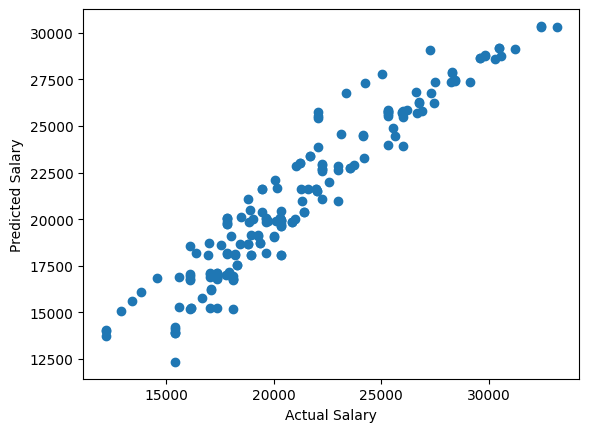

In [439]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


In [440]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)


0.9102703650996729

In [441]:
y_pred_test = lr.predict(X_test)

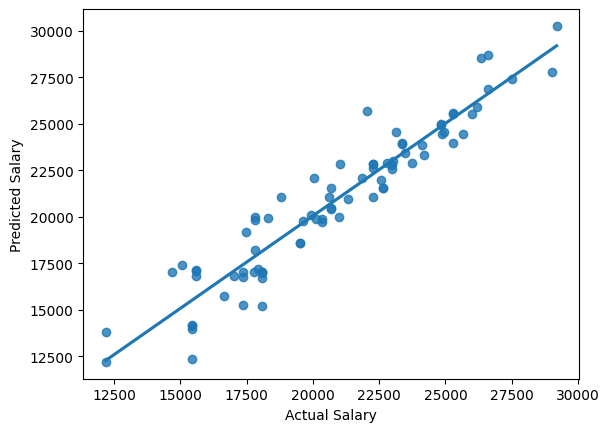

In [442]:
#Visualisasi prediksi
sns.regplot(x=y_test,y=y_pred_test, ci = None)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


In [443]:
H2=r2_score(y_test,y_pred_test)*100
H2

89.30897084048117

eksperiman tanpa kolom rank

In [444]:
dataset3 = dataset3.loc[:, ['Profession','Equipment','Insalubrity','Size_Production','Salary']]

In [445]:
dataset3

,Profession,Equipment,Insalubrity,Size_Production,Salary
1970-01-01 00:00:00.000000000,Metal heater,Heating furnaces,22,580,26020.000000
1970-01-01 00:00:00.000000001,Metal heater,Heating furnaces,22,580,22980.000000
1970-01-01 00:00:00.000000002,Metal heater,Heating furnaces,22,580,20350.000000
1970-01-01 00:00:00.000000003,Metal heater,Heating furnaces,22,580,20350.000000
1970-01-01 00:00:00.000000004,Metal heater,Heating furnaces,22,580,18090.000000
...,...,...,...,...,...
1970-01-01 00:00:00.000000259,Quality controller,Control and measuring equipment,0,1180,26342.235294
1970-01-01 00:00:00.000000260,Quality controller,Control and measuring equipment,0,1080,25044.588235
1970-01-01 00:00:00.000000261,Quality controller,Control and measuring equipment,0,780,22060.000000
1970-01-01 00:00:00.000000262,Quality controller,Control and measuring equipment,0,1020,24266.000000


In [446]:
le = LabelEncoder()
dataset3['Profession'] = le.fit_transform(dataset1['Profession'])
dataset3['Equipment'] = le.fit_transform(dataset1['Equipment'])
dataset3

,Profession,Equipment,Insalubrity,Size_Production,Salary
1970-01-01 00:00:00.000000000,2,2,22,580,26020.000000
1970-01-01 00:00:00.000000001,2,2,22,580,22980.000000
1970-01-01 00:00:00.000000002,2,2,22,580,20350.000000
1970-01-01 00:00:00.000000003,2,2,22,580,20350.000000
1970-01-01 00:00:00.000000004,2,2,22,580,18090.000000
...,...,...,...,...,...
1970-01-01 00:00:00.000000259,5,1,0,1180,26342.235294
1970-01-01 00:00:00.000000260,5,1,0,1080,25044.588235
1970-01-01 00:00:00.000000261,5,1,0,780,22060.000000
1970-01-01 00:00:00.000000262,5,1,0,1020,24266.000000


In [447]:
dataset1.isnull().sum()


Profession         0
Rank               0
Equipment          0
Insalubrity        0
Size_Production    0
Salary             0
dtype: int64

In [448]:
X = dataset3.drop(columns = 'Salary')
X

,Profession,Equipment,Insalubrity,Size_Production
1970-01-01 00:00:00.000000000,2,2,22,580
1970-01-01 00:00:00.000000001,2,2,22,580
1970-01-01 00:00:00.000000002,2,2,22,580
1970-01-01 00:00:00.000000003,2,2,22,580
1970-01-01 00:00:00.000000004,2,2,22,580
...,...,...,...,...
1970-01-01 00:00:00.000000259,5,1,0,1180
1970-01-01 00:00:00.000000260,5,1,0,1080
1970-01-01 00:00:00.000000261,5,1,0,780
1970-01-01 00:00:00.000000262,5,1,0,1020


In [449]:
y = dataset3['Salary']
y

1970-01-01 00:00:00.000000000    26020.000000
1970-01-01 00:00:00.000000001    22980.000000
1970-01-01 00:00:00.000000002    20350.000000
1970-01-01 00:00:00.000000003    20350.000000
1970-01-01 00:00:00.000000004    18090.000000
                                     ...     
1970-01-01 00:00:00.000000259    26342.235294
1970-01-01 00:00:00.000000260    25044.588235
1970-01-01 00:00:00.000000261    22060.000000
1970-01-01 00:00:00.000000262    24266.000000
1970-01-01 00:00:00.000000263    22060.000000
Name: Salary, Length: 264, dtype: float64

In [450]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [451]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [452]:
lr.fit(X_train,y_train)

LinearRegression()

In [453]:
c = lr.intercept_
c


9602.086718541701

In [454]:
m = lr.coef_
m


array([ 384.71803551, -575.08833445,  249.88003596,    7.7536655 ])

In [455]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([22433.67083879, 18414.63793383, 22818.3888743 , 21103.97263144,
       20874.88088599, 20540.45936885, 24184.68215518, 19215.83290348,
       26307.53835057, 24023.10551523, 24372.0872145 , 21235.32402448,
       22813.2972617 , 19634.29440554, 19956.63935456, 20833.85728497,
       23868.03220517, 20197.98099948, 21076.71262415, 19374.4443038 ,
       22539.66369559, 24026.6436055 , 19215.83290348, 21417.63747119,
       20844.10265907, 20617.99602388, 16545.02653332, 22654.705732  ,
       24023.10551523, 20275.51765451, 24252.75024069, 19866.90437062,
       14761.68346767, 16312.41656823, 20999.17596913, 18042.53770396,
       22786.05712505, 24410.78879037, 20850.60598897, 19215.83290348,
       20766.56600404, 22084.68913952, 21119.68917998, 23200.98053684,
       18989.72626829, 23641.92556998, 21115.54770331, 18751.41201187,
       21076.71262415, 16181.65798328, 20850.60598897, 20766.56600404,
       25573.83861579, 24023.10551523, 22658.22395164, 23251.27705522,
      

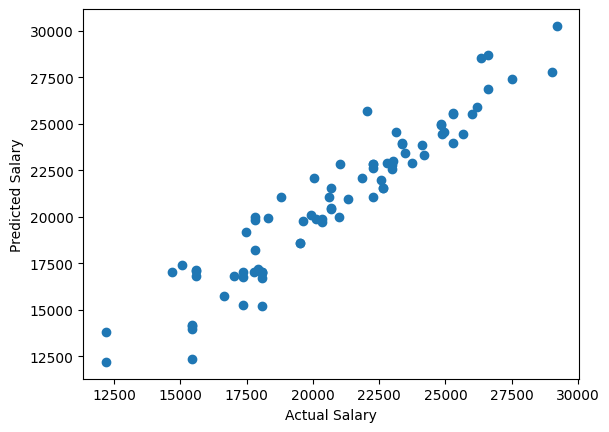

In [456]:
#Visualisasi prediksi
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


In [457]:
r2_score(y_train,y_pred_train)

0.3464289364448495

In [458]:
 y_pred_test = lr.predict(X_test)

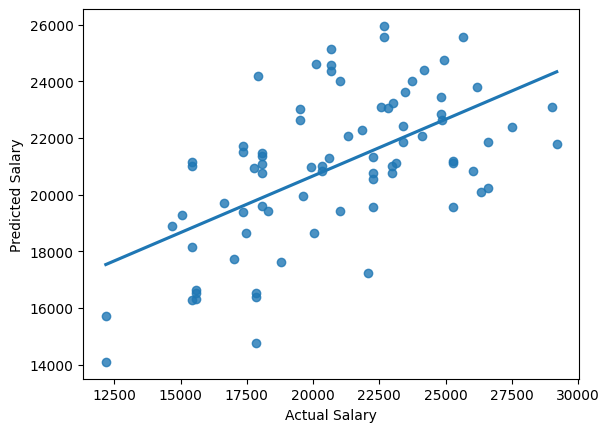

In [459]:
#Visualisasi prediksi
sns.regplot(x=y_test,y=y_pred_test, ci = None)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


In [460]:
H1=r2_score(y_test,y_pred_test)*100
H1

32.38630049396569

**HASIL PERBANDINGAN**

In [461]:
print('Score dengan menghapus 1 fitur Rank  \t\t:\t',H1)
print('Score dengan menghapus 1 fitur Insalubrity \t:\t',H2)
print('Score lengkap tanpa menghapus fitur \t\t:\t',H3)

Score dengan menghapus 1 fitur Rank  		:	 32.38630049396569
Score dengan menghapus 1 fitur Insalubrity 	:	 89.30897084048117
Score lengkap tanpa menghapus fitur 		:	 96.57282855759746
